In [311]:
import pandas as pd
df = pd.read_csv('train.csv')

In [312]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [313]:
df.columns
#Index(['PassengerId', 
#'Survived' 생존여부
#'Pclass' 객실등급
#'Name', 'Sex', 'Age', 
#'SibSp' 형제자매배우자
#'Parch' 부모
#'Ticket', 
#'Fare' 요금
#'Cabin' 객식넘버
#'Embarked' 항구

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [314]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [315]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)

In [316]:
group=df.groupby('Survived').size()
group

Survived
0    549
1    342
dtype: int64

In [317]:
df.value_counts('Survived', normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

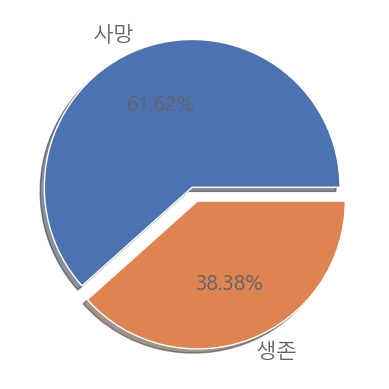

In [318]:
labels= ['사망','생존']
plt.pie(group.values,labels=labels, autopct='%.2f%%',
        explode=[0.05]*len(group), shadow=True, textprops={'color':"#64616A", 'fontsize':15})

plt.show()

In [319]:
import seaborn as sns
sns.set_theme(font='Malgun Gothic', style='white')

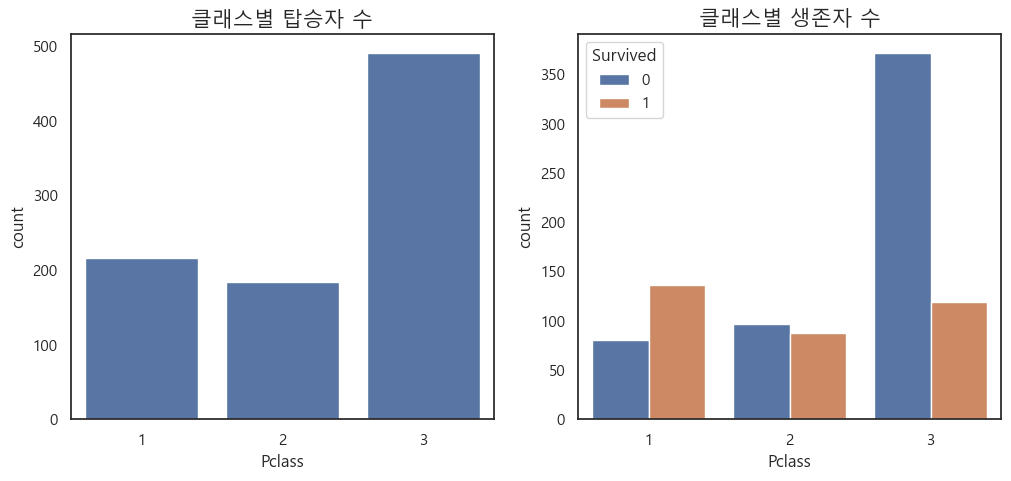

In [320]:
fig, axs = plt.subplots(1,2, figsize=(12,5))
axs[0].set_title('클래스별 탑승자 수', size=15)
sns.countplot(x='Pclass', data=df, ax=axs[0])

axs[1].set_title('클래스별 생존자 수', size=15)
sns.countplot(x='Pclass', hue='Survived', data=df, ax=axs[1])
plt.show()


In [321]:
#성별 생존율
gender = df.groupby('Sex').size().to_frame('탑승인원')
gender

,탑승인원
Sex,
female,314
male,577


In [322]:
filt = df['Survived'] == 1
gender_survived = df[filt].groupby('Sex').size().to_frame('생존자수')
gender_survived

,생존자수
Sex,
female,233
male,109


In [323]:
join = gender_survived.join(gender)
join['생존율'] = join['생존자수'] / join['탑승인원']
join

,생존자수,탑승인원,생존율
Sex,,,
female,233,314,0.742038
male,109,577,0.188908


In [324]:
#탑승 클래스별 생존율
df['Pclass'].unique()
filt = df['Survived'] == 1
pclass_survived = df[filt].groupby('Pclass').size().to_frame('생존자수')
pclass_survived

,생존자수
Pclass,
1,136
2,87
3,119


In [325]:
pclass = df.groupby('Pclass').size().to_frame('탑승자수')
pclass

,탑승자수
Pclass,
1,216
2,184
3,491


In [326]:
join = pclass.join(pclass_survived)
join['생존율'] = join['생존자수'] / join['탑승자수']
join

,탑승자수,생존자수,생존율
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363


In [327]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

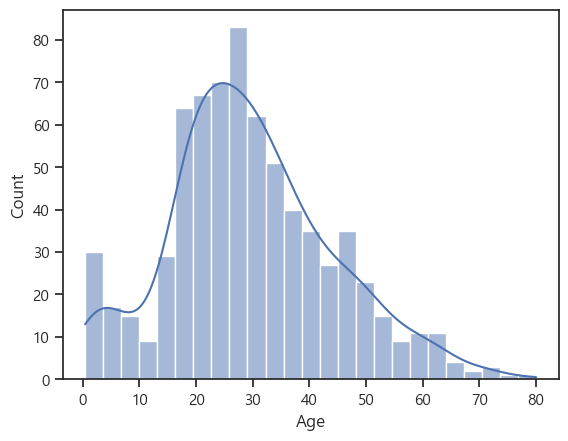

In [328]:
sns.set_theme(font='Malgun Gothic', style='ticks')
sns.histplot(data=df, x='Age', bins=25, kde=True)
plt.show()

In [329]:
#연령대별 사망자, 생존자 그래프
survived = df[df['Survived']==1]
dead = df[df['Survived']==0]

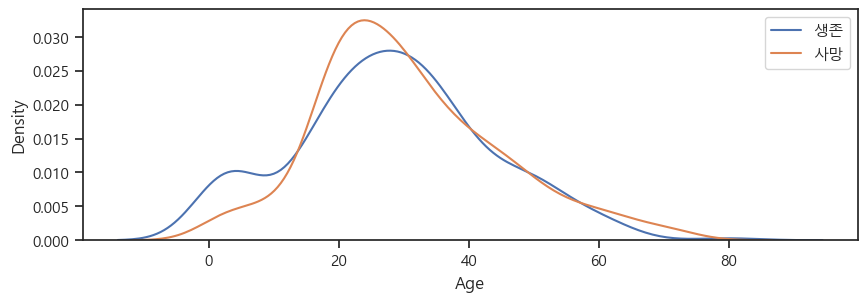

In [330]:
plt.figure(figsize=(10,3))
sns.kdeplot(survived['Age'], label='생존')
sns.kdeplot(dead['Age'], label='사망')
plt.legend()
plt.show()

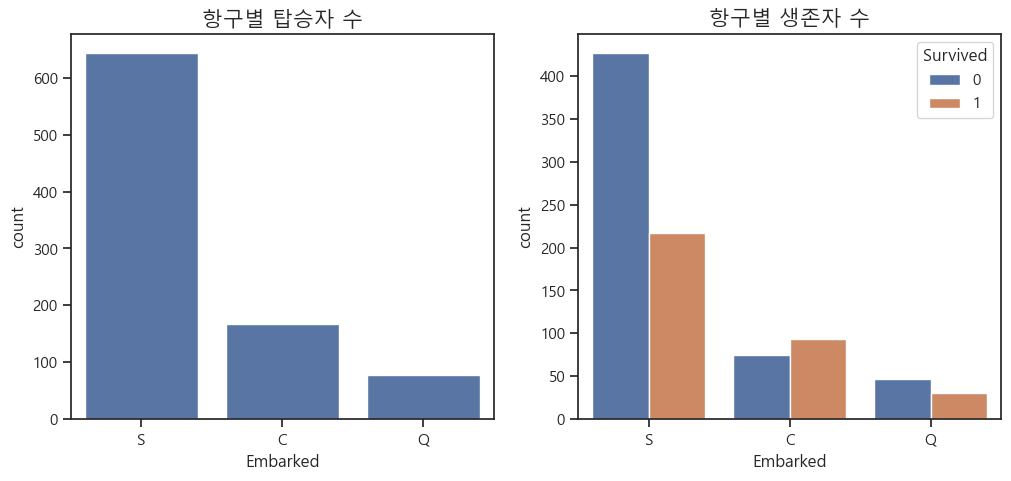

In [331]:
#탑승항구별 생존율
fig, axs = plt.subplots(1,2, figsize=(12,5))
axs[0].set_title('항구별 탑승자 수', size=15)
sns.countplot(x='Embarked', data=df, ax=axs[0])

axs[1].set_title('항구별 생존자 수', size=15)
sns.countplot(x='Embarked', hue='Survived', data=df, ax=axs[1])
plt.show()


In [332]:
embarked = df.groupby('Embarked').size().to_frame('탑승자수')
embarked

,탑승자수
Embarked,
C,168
Q,77
S,644


In [333]:
embarked_survived = df[df['Survived'] == 1].groupby('Embarked').size().to_frame('생존자수')
embarked_survived

,생존자수
Embarked,
C,93
Q,30
S,217


In [334]:
join = embarked.join(embarked_survived)
join['생존율'] = join['생존자수'] / join['탑승자수']
join

,탑승자수,생존자수,생존율
Embarked,,,
C,168,93,0.553571
Q,77,30,0.389610
S,644,217,0.336957


In [ ]:
c1 = df[df['Pclass']==1].value_counts('Embarked')
c2 = df[df['Pclass']==2].value_counts('Embarked')
c3 = df[df['Pclass']==3].value_counts('Embarked')
pclass = pd.DataFrame([c1,c2,c3])
pclass.index=['1등급','2등급','3등급']
pclass.columns=['S항구','C항구','Q항구']
pclass.index.name='등급'
pclass['S항구']+pclass['C항구']


Index(['1등급', '2등급', '3등급'], dtype='object', name='등급')

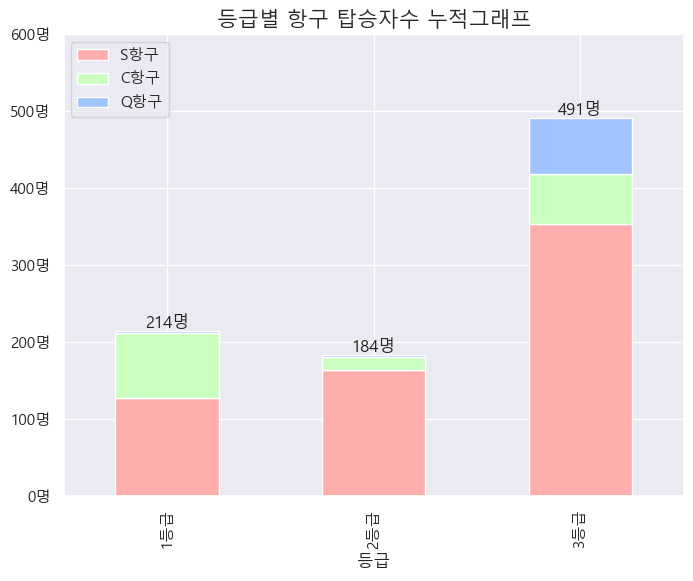

In [ ]:
sns.set_theme(font='Malgun Gothic', style='darkgrid')
fig, ax = plt.subplots(figsize=(8,6))
colors = ['#FFADAD','#CAFFBF','#A0C4FF']
pclass.plot(kind='bar', stacked=True, ax=ax, color=colors)
ax.set_title('등급별 항구 탑승자수 누적그래프', size=15)
grade=pclass.index
plt.xticks(grade, )

plt.ylim(0,600)
plt.yticks([y for y in range(0,601,100)], [f'{y}명' for y in range(0,601,100)])
for idx, p in enumerate(pclass['S항구']+pclass['C항구']+pclass['Q항구']):
    ax.text(idx,p+4,f'{p}명',ha='center')

plt.show()